## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 


#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm


****

In [3]:
import math
import pandas as pd
import seaborn as sb
import numpy
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head(1)


,temperature,gender,heart_rate
0,99.3,F,68.0


# Checking whether the sample distribution of body temperature is normal

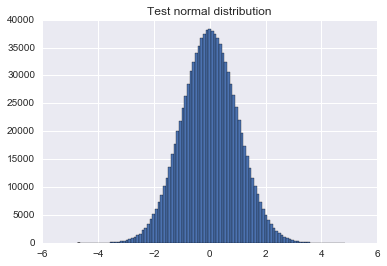

In [5]:
# Building test normal distribution
testDist = numpy.array([(numpy.random.normal(loc=0.0, scale=1.0, size=None)) for i in range(1000000)])
plt.figure()
plt.hist(testDist, 100);
plt.title('Test normal distribution')
pvSl = 0.05 # setting significance level of 5%

In [6]:
# Testing the distribution for normality. In facct we already know it is normal. This is to check if the code gives the
# right results
if scipy.stats.mstats.normaltest(testDist, axis=None).pvalue >= pvSl:
    print ("Test distribution is normal")  
else:
    print("Test distribution is NOT normal")

Test distribution is normal


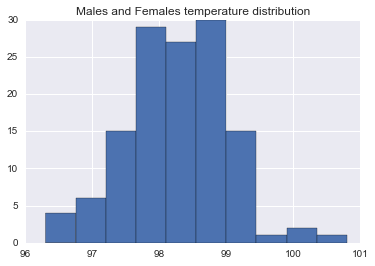

In [7]:
# Building temperature sample distribution of both Males and Females in the data set and testining it for being normal or not
plt.figure()
plt.hist(df.temperature);
plt.title('Males and Females temperature distribution')

In [8]:
if scipy.stats.mstats.normaltest(df.temperature, axis=None).pvalue >= pvSl:
    print ("Male and Female temperature sample distribution is normal")
else:
    print("Male and Female temperature sample distribution is NOT normal")

Male and Female temperature sample distribution is normal



# Is the true population mean really 98.6 degrees F?

In [9]:
df.temperature.describe() # Getting intial stats for the sample


count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [10]:
# H0: the population mean is 98.6F => sample distribution mean = 98.6
#H1: the population mean is not 98.6F =>  sample distribution mean != 98.6
# Assume: H0 = True
# Sample size = 130 (130>30 ==>> Z statistic)

In [11]:
# Standard deviaton of the sampling distribution
sigSD = (df.temperature.std())/(math.sqrt(df.temperature.count()))
sigSD = round(sigSD, 3)
sigSD


0.064

In [12]:
# Z-score
z = (98.6 - df.temperature.mean())/sigSD
z = round(z)
z # the probobility of getting 98.2 result by chance is very small (more than 5 stds away from the mean) 
p_value = scipy.stats.norm.sf(abs(z))*2
print('z-score',z,'p-value',p_value)

# Reject H0 ==>> the population mean is most likely not 98.6 F

z-score 5 p-value 5.73303143758e-07


# What temperature should be considered as abnormal?

In [13]:
# Assume temperature which falls beyond 95% confidence interval as abnormal
# As the sample size is 130 Z-distribution is used. Using Z table it has been identified that 95% confidence inteval lies 
# between 98.07 and 98.32 F with 98.2F mean

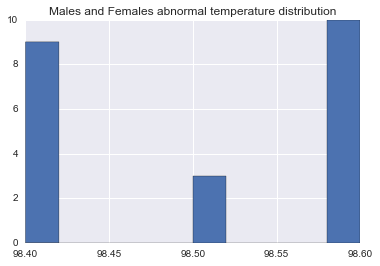

In [14]:
# Getting a distribution of all abnormal temperatures in the sample
temp_abnormal = df[(df.temperature < 98.7) & (df.temperature > 98.32)]
plt.figure()
plt.hist(temp_abnormal.temperature);
plt.title('Males and Females abnormal temperature distribution')


# Find if there a significant difference between males and females in normal temperature:

In [39]:
tmale = df.temperature[df.gender == 'M']
tfemale = df.temperature[df.gender == 'F']
tmale.describe() # Get stats for Male sample 

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [40]:
tfemale.describe() # Get stats for Female sample

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

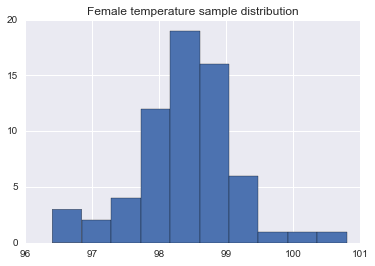

In [43]:
plt.hist(tfemale)
plt.title('Female temperature sample distribution')


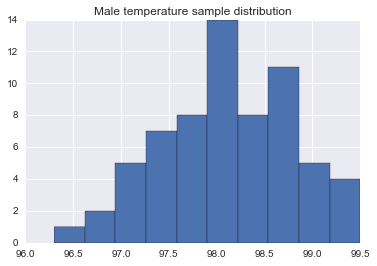

In [45]:
plt.hist(tmale)
plt.title('Male temperature sample distribution')

In [58]:
# Calculating difference in means between Females and Males, identifying z-score (from z-table), calculate confidence interval
F_M = tfemale.mean() - tmale.mean()
# Set 95% 2 tailed confidence interval
z_score = 1.96
Sig_MF = math.sqrt((math.pow(tfemale.std(),2))/tfemale.count() + (math.pow(tmale.std(),2))/tmale.count())
interval = Sig_MF*z_score
print('Confidence interval lies between (95% chance that the true mean of the distribution lies whithin)', F_M-interval, F_M+interval)


Confidence interval lies between (95% chance that the true mean of the distribution lies whithin) 0.0411850264078672 0.5372765120535867


In [66]:
# Temperature difference hypothesis testing
# H0: there is no difference in temperatures between Females and Males ==>> tfemale.mean() - tmale.mean() = 0
# H1: there is a difference in temperatures between Females and Males ==>> tfemale.mean() - tmale.mean != 0
sig_lvl = 0.05
z_score = 1.65
interval = z_score*Sig_MF
if interval <= F_M:
    print('H0 >> rejected there is a difference in temperatures')
else:
    print('H0>> valid there is no difference in temperatures')

H0 >> rejected there is a difference in temperatures
